In [12]:
# Remember to update your path
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/runmin/Documents/Qishi/QishiQR')

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_Offsets import MajorContracts
from Utils.MajorContract_split import MajorContracts


import warnings
warnings.filterwarnings(action='ignore')


from config import RuConfig

def Generate_Direction(mj, threshold = np.linspace(1,15,num=(15.-1)/2+1)):
    result = pd.DataFrame(index=mj.index)
    for thx in threshold:
        result[round(thx,1)] = mj['LastPrice'].diff().apply(lambda x: 2 if x > thx 
                                            else (1 if x < -thx else 0))
    return result
 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


----

# 1. Price-change 

In [13]:

# ====== Initial Configuration - Rb 5min ========
params = RuConfig(frequency=5)

mj5 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_5, mj_test_5, ptb_5 = mj5.create_major_overlap()

PT_5 = Generate_Direction(mj_train_5)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_5 = PT_5.apply(pd.value_counts).T
Value_Prob_5 = Value_Prob_5.div(Value_Prob_5.sum(axis=1), axis=0)

ru1605 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-5-16'] 2016-01-01 00:00:00 2016-03-17 00:00:00
probability table:  20160104.0 20160316.0
ru1609 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-19'] 2016-03-17 00:00:00 2016-08-01 00:00:00
probability table:  20160317.0 20160729.0
ru1701 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-08-01 00:00:00 2016-11-23 00:00:00
ru1705 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1705 ['2016-11-15', '2017-1-31'] 2016-11-23 00:00:00 2016-12-31 00:00:00


In [14]:
# ====== Initial Configuration - Rb 10min ========
params = RuConfig(frequency=10)

mj10 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_10, mj_test_10, ptb_10 = mj10.create_major_overlap()

PT_10 = Generate_Direction(mj_train_10)
Frequency_Count = PT_10.apply(pd.value_counts).T

Value_Prob_10 = PT_10.apply(pd.value_counts).T
Value_Prob_10 = Value_Prob_10.div(Value_Prob_10.sum(axis=1), axis=0)

ru1605 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-5-16'] 2016-01-01 00:00:00 2016-03-17 00:00:00
probability table:  20160104.0 20160316.0
ru1609 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-19'] 2016-03-17 00:00:00 2016-08-01 00:00:00
probability table:  20160317.0 20160729.0
ru1701 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-08-01 00:00:00 2016-11-23 00:00:00
ru1705 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1705 ['2016-11-15', '2017-1-31'] 2016-11-23 00:00:00 2016-12-31 00:00:00


In [16]:
# ====== Initial Configuration - Bu 15min ========
params = RuConfig(frequency=15)

mj15 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_15, mj_test_15, ptb_15 = mj15.create_major_overlap()

PT_15 = Generate_Direction(mj_train_15)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_15 = PT_15.apply(pd.value_counts).T
Value_Prob_15 = Value_Prob_15.div(Value_Prob_15.sum(axis=1), axis=0)

ru1605 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-5-16'] 2016-01-01 00:00:00 2016-03-17 00:00:00
probability table:  20160104.0 20160316.0
ru1609 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-19'] 2016-03-17 00:00:00 2016-08-01 00:00:00
probability table:  20160317.0 20160729.0
ru1701 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1701 ['2016-6-1', '2016-12-15'] 2016-08-01 00:00:00 2016-11-23 00:00:00
ru1705 /home/runmin/Documents/Qishi/tick2016//ru
0
ID trade_range transition_begin transition_end
1705 ['2016-11-15', '2017-1-31'] 2016-11-23 00:00:00 2016-12-31 00:00:00


## 1.1 Compare the probability of price change

Text(0.5,0,'Price threshold')

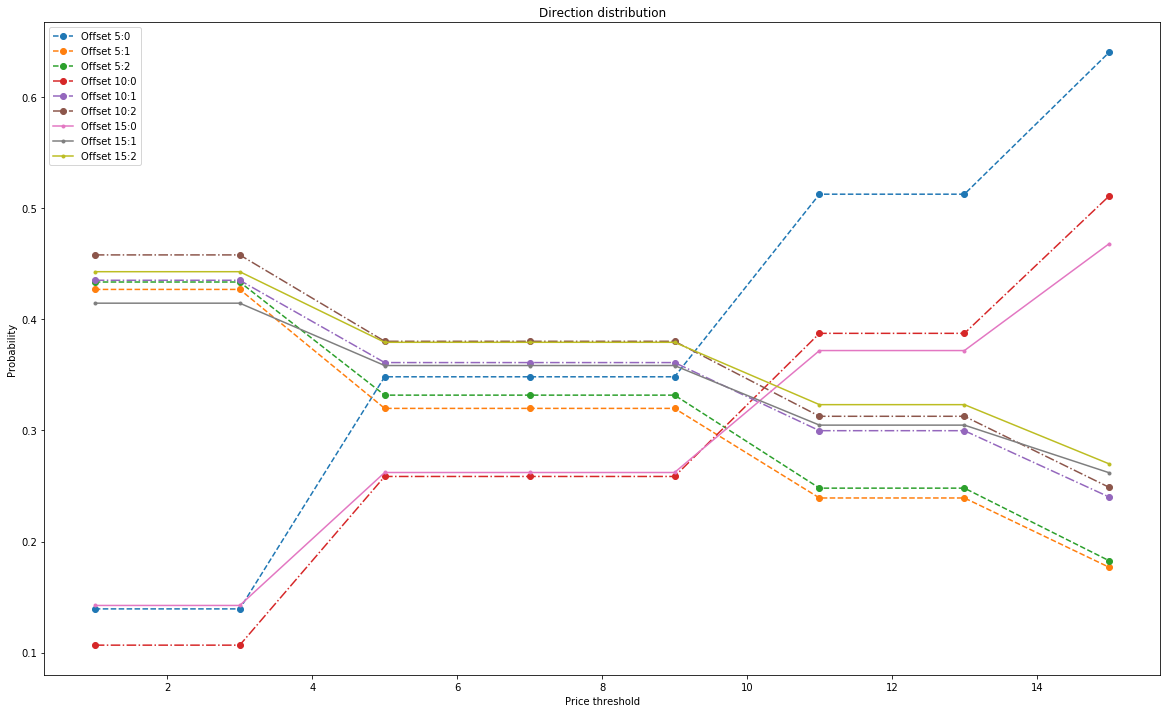

In [32]:
fig = plt.figure(figsize=(20,12))
ax = plt.gca()
Value_Prob_5.plot(ax = ax, marker='o', style='--')
legend_5 = ['Offset 5:{}'.format(x) for x in [0,1,2]]
Value_Prob_10.plot(ax = ax, marker='o', style='-.')
legend_10 = ['Offset 10:{}'.format(x) for x in [0,1,2]]
Value_Prob_15.plot(ax = ax, marker='.')
legend_15 = ['Offset 15:{}'.format(x) for x in [0,1,2]]

plt.legend(legend_5+legend_10+legend_15)
ax.set_title('Direction distribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Price threshold')

-----

# 2. Check the probability table

In [18]:
ptb_5_df = pd.concat(ptb_5)
ptb_5_df.index = ptb_5_df.index.droplevel(level=0)
ptb_5_df['len'] = ptb_5_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_5_df[ptb_5_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.5 0.5]

Prior length:3 	0,1,2: [0.55555556 0.44444444]

Prior length:4 	0,1,2: [0.59259259 0.40740741]

Prior length:5 	0,1,2: [0.48148148 0.46296296 0.05555556]

Prior length:6 	0,1,2: [0.4691358  0.42386831 0.10699588]

Prior length:7 	0,1,2: [0.39368999 0.33539095 0.27091907]

Prior length:8 	0,1,2: [0.49565615 0.27572016 0.22862369]


In [19]:
ptb_10_df = pd.concat(ptb_10)
ptb_10_df.index = ptb_10_df.index.droplevel(level=0)
ptb_10_df['len'] = ptb_10_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_10_df[ptb_10_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.5 0.5]

Prior length:3 	0,1,2: [0.61111111 0.38888889]

Prior length:4 	0,1,2: [0.55555556 0.44444444]

Prior length:5 	0,1,2: [0.51851852 0.4382716  0.04320988]

Prior length:6 	0,1,2: [0.44855967 0.34773663 0.2037037 ]

Prior length:7 	0,1,2: [0.42935528 0.31687243 0.25377229]

Prior length:8 	0,1,2: [0.65272062 0.19227252 0.15500686]


In [20]:
ptb_15_df = pd.concat(ptb_15)
ptb_15_df.index = ptb_15_df.index.droplevel(level=0)
ptb_15_df['len'] = ptb_15_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_15_df[ptb_15_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.5 0.5]

Prior length:3 	0,1,2: [0.5 0.5]

Prior length:4 	0,1,2: [0.51851852 0.48148148]

Prior length:5 	0,1,2: [0.48148148 0.43209877 0.08641975]

Prior length:6 	0,1,2: [0.3909465  0.32304527 0.28600823]

Prior length:7 	0,1,2: [0.48285322 0.28395062 0.23319616]

Prior length:8 	0,1,2: [0.69341564 0.16735254 0.13923182]


# 3. Check the generated signal

In [22]:
params = RuConfig(frequency=5)

slm_5 = ptb_5_df.groupby(['prior']).sum().reset_index()
slm_5['signal'] = slm_5.loc[:, '0':'2'].idxmax(axis=1)

signal_5 = MajorSeriesTest(mj_test_5, params.output_path, slm_5)
signal_5.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_5.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 5min
Prior length:2 	0,1,2: [0.50096899 0.49903101]
Prior length:3 	0,1,2: [0.57000969 0.42999031]
Prior length:4 	0,1,2: [0.52858527 0.46608527 0.00532946]
Prior length:5 	0,1,2: [0.51332364 0.48013566 0.0065407 ]
Prior length:6 	0,1,2: [0.50629845 0.46632752 0.02737403]
Prior length:7 	0,1,2: [0.51477713 0.39026163 0.09496124]


In [23]:
params = RuConfig(frequency=10)

slm_10 = ptb_10_df.groupby(['prior']).sum().reset_index()
slm_10['signal'] = slm_10.loc[:, '0':'2'].idxmax(axis=1)

signal_10 = MajorSeriesTest(mj_test_10, params.output_path, slm_10)
signal_10.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_10.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 10min
Prior length:2 	0,1,2: [0.57068803 0.42931197]
Prior length:3 	0,1,2: [0.52874647 0.47125353]
Prior length:4 	0,1,2: [0.60367578 0.39538172 0.00094251]
Prior length:5 	0,1,2: [0.51508011 0.47408106 0.01083883]
Prior length:6 	0,1,2: [0.48916117 0.45994345 0.05089538]
Prior length:7 	0,1,2: [0.48916117 0.36569274 0.14514609]


In [25]:
params = RuConfig(frequency=15)

slm_15 = ptb_15_df.groupby(['prior']).sum().reset_index()
slm_15['signal'] = slm_15.loc[:, '0':'2'].idxmax(axis=1)

signal_15 = MajorSeriesTest(mj_test_15, params.output_path, slm_15)
signal_15.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_15.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 15min
Prior length:2 	0,1,2: [0.69369973 0.30630027]
Prior length:3 	0,1,2: [0.65616622 0.34383378]
Prior length:4 	0,1,2: [0.56635389 0.43364611]
Prior length:5 	0,1,2: [0.51407507 0.42426273 0.0616622 ]
Prior length:6 	0,1,2: [0.44906166 0.44436997 0.10656836]
Prior length:7 	0,1,2: [0.42761394 0.36662198 0.20576408]


----
# Backtest

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.233361,0.007458,-0.002509,0.001453,0.000192,-0.023186,0.025695,-0.065488,0.578929,7.989795,2258,1.432565,0.639061
1,0.238891,0.007421,-0.002379,0.001454,0.000171,-0.019224,0.025695,-0.046807,0.611447,7.766107,2516,1.430419,0.588235
2,0.239539,0.003409,-0.002787,0.001558,0.000104,-0.030216,0.012980,-0.079891,0.558928,3.557662,1902,1.197710,0.597266
3,0.226260,0.004107,-0.002658,0.001468,0.000114,-0.030216,0.011769,-0.100331,0.552348,4.538363,2088,1.238230,0.600575
4,0.185627,0.004462,-0.002502,0.001590,0.000131,-0.029420,0.012980,-0.072240,0.635571,6.008873,1975,1.258776,0.595443
5,0.235480,0.003283,-0.002233,0.001701,0.000090,-0.025066,0.024591,-0.073715,0.761595,3.485856,2115,1.190437,0.540898
6,0.271967,0.004517,-0.002105,0.001789,0.000121,-0.021798,0.024591,-0.087774,0.849655,4.152576,2170,1.262013,0.525806


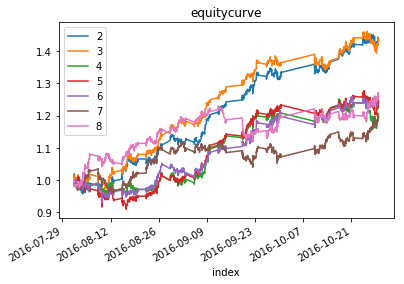

In [26]:
from config import RuConfig
params=RuConfig(frequency=5)

Rb_5_test = MajorSeriesTest(mj_test_5, params.output_path, slm_5 )
Rb_5_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_5_test.run()
Rb_5_test.plot()
Rb_5_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.236784,0.003056,-0.003774,0.001950,0.000152,-0.028624,0.017274,-0.089063,0.516786,3.226867,1164,1.177264,0.638316
1,0.222073,0.001524,-0.003946,0.001996,0.000087,-0.030216,0.017274,-0.081793,0.505725,1.715485,1012,1.088383,0.672925
2,0.247548,0.001726,-0.003593,0.002175,0.000097,-0.023234,0.020174,-0.110910,0.605371,1.742691,1037,1.100085,0.621022
3,0.262565,0.001416,-0.003288,0.002417,0.000079,-0.028624,0.033156,-0.166369,0.735077,1.347822,1033,1.082103,0.537270
4,0.269175,0.002532,-0.003296,0.002297,0.000130,-0.028624,0.027645,-0.072001,0.696893,2.351476,1130,1.146846,0.582301
5,0.311843,-0.000165,-0.002981,0.002434,-0.000008,-0.025695,0.024693,-0.146064,0.816589,-0.132381,1154,0.990423,0.511265
6,0.286511,0.000312,-0.002723,0.002417,0.000015,-0.021784,0.025695,-0.115766,0.887757,0.272546,1216,1.018116,0.493421


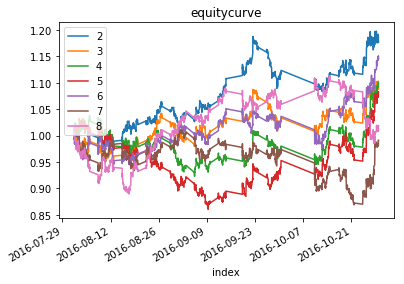

In [27]:
params=RuConfig(frequency=10)

Rb_10_test = MajorSeriesTest(mj_test_10, params.output_path, slm_10 )
Rb_10_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_10_test.run()
Rb_10_test.plot()
Rb_10_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.322230,0.002519,-0.004255,0.004822,0.000411,-0.034844,0.041155,-0.108777,1.133313,1.954048,355,1.146080,0.492958
1,0.287094,0.002945,-0.004426,0.003575,0.000319,-0.032196,0.027205,-0.090320,0.807744,2.564492,535,1.170810,0.577570
2,0.289184,0.001143,-0.004317,0.003018,0.000095,-0.030216,0.028306,-0.130184,0.699139,0.988473,698,1.066317,0.560172
3,0.256813,-0.002595,-0.004638,0.003091,-0.000234,-0.031265,0.021030,-0.224453,0.666323,-2.526044,644,0.849497,0.518634
4,0.286219,0.003160,-0.003468,0.003115,0.000232,-0.022437,0.021030,-0.091364,0.898219,2.760480,791,1.183304,0.523388
5,0.249005,0.001820,-0.003116,0.003165,0.000133,-0.032399,0.020590,-0.129799,1.015739,1.826933,795,1.105540,0.469182
6,0.329329,0.000731,-0.003531,0.003033,0.000050,-0.032399,0.029425,-0.134479,0.858880,0.555122,850,1.042414,0.491765


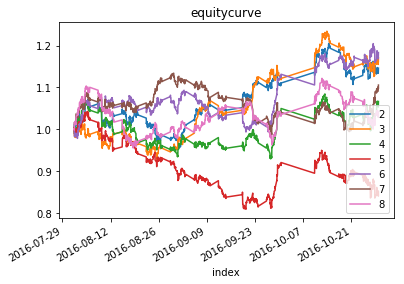

In [28]:
params=RuConfig(frequency=15)

Rb_15_test = MajorSeriesTest(mj_test_15, params.output_path, slm_15 )
Rb_15_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Rb_15_test.run()
Rb_15_test.plot()
Rb_15_test.performance